In [1]:
import pickle
# add multipoles package path
import sys
# sys.path.append('/Users/nem0x/Documents/Pyckages')
sys.path.append('/Users/Ben/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/trap_tools')
sys.path.append('/Users/Ben/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/ionLifetimes/bem/examples/SimpleTrap')
from Electrodes.multipoles import MultipoleControl

%matplotlib inline
import numpy as np
import pandas as pd
from itertools import compress
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition, mark_inset, zoomed_inset_axes
from ipywidgets import interactive, interact
import ipywidgets as widgets

/Users/Ben/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  


# define some useful functions

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.3f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# import data, and define parameters

In [3]:
path = '/Users/Ben/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/ionLifetimes/bem/examples/SimpleTrap/htrap_simulation_1.pkl'

f = open(path,'rb')
trap = pickle.load(f)

In [4]:
zl = 266*1e-3
xl = -3.7*1e-3
yl = 76.32*1e-3
position = [xl,yl,zl]
nROI = 5
roi = [nROI,nROI,nROI]
order = 2
trap['Z'] = np.array(trap['Z'])
trap['X'] = np.array(trap['X'])
trap['Y'] = np.array(trap['Y'])
controlled_electrodes = [
                         'DC1', 'DC2', 'DC3','DC7','DC9','DC10','DC13','DC15','DC16','DC17','DC18','DC19',
                        'DC20','DC21'
#                          'RF1', 'RF2'
                        ]
used_order1multipoles = ['Ex','Ey','Ez']
used_order2multipoles = ['U1','U2','U3','U4','U5']
used_multipoles = used_order1multipoles + used_order2multipoles
print(used_multipoles)
position = np.array(position)
x0_ind = (np.abs(trap['X'] - position[0])).argmin()
y0_ind = (np.abs(trap['Y'] - position[1])).argmin()
z0_ind = (np.abs(trap['Z'] - position[2])).argmin()
print(trap['X'])

['Ex', 'Ey', 'Ez', 'U1', 'U2', 'U3', 'U4', 'U5']
[-0.052672 -0.050672 -0.048672 -0.046672 -0.044672 -0.042672 -0.040672
 -0.038672 -0.036672 -0.034672 -0.032672 -0.030672 -0.028672 -0.026672
 -0.024672 -0.022672 -0.020672 -0.018672 -0.016672 -0.014672 -0.012672
 -0.010672 -0.008672 -0.006672 -0.004672 -0.002672 -0.000672  0.001328
  0.003328  0.005328  0.007328  0.009328  0.011328  0.013328  0.015328
  0.017328  0.019328  0.021328  0.023328  0.025328  0.027328  0.029328
  0.031328  0.033328  0.035328  0.037328  0.039328  0.041328  0.043328
  0.045328]


# create object

In [5]:
print(trap['Y'])

[0.02732 0.02932 0.03132 0.03332 0.03532 0.03732 0.03932 0.04132 0.04332
 0.04532 0.04732 0.04932 0.05132 0.05332 0.05532 0.05732 0.05932 0.06132
 0.06332 0.06532 0.06732 0.06932 0.07132 0.07332 0.07532 0.07732 0.07932
 0.08132 0.08332 0.08532 0.08732 0.08932 0.09132 0.09332 0.09532 0.09732
 0.09932 0.10132 0.10332 0.10532 0.10732 0.10932 0.11132 0.11332 0.11532
 0.11732 0.11932 0.12132 0.12332 0.12532]


In [6]:
s = MultipoleControl(trap, position, roi, controlled_electrodes, used_multipoles, order)
print('Multipole names:', s.multipole_names)
print('Normalization factors:', s.normalization_factors)

Multipole names: ['C', 'Ey', 'Ez', 'Ex', 'U3', 'U4', 'U2', 'U5', 'U1']
Normalization factors: [0.28209479 0.48860251 0.48860251 0.48860251 1.09254843 1.09254843
 0.63078313 1.09254843 0.54627422]


In [7]:
s.multipole_expansion

,DC1,DC2,DC3,DC4,DC5,DC6,DC7,DC8,DC9,DC10,...,DC12,DC13,DC14,DC15,DC16,DC17,DC18,DC19,DC20,DC21
C,0.006563,0.024969,0.030268,0.026110,0.006721,0.002244,0.001531,0.001108,0.000912,0.000775,...,0.020517,0.022609,0.021197,0.006181,0.002133,0.001472,0.001061,0.000879,0.000754,0.317014
Ey,0.033643,0.158876,0.007325,-0.163437,-0.035223,-0.007687,-0.004296,-0.002511,-0.001752,-0.001282,...,0.113309,0.004252,-0.114948,-0.030611,-0.007109,-0.004031,-0.002361,-0.001652,-0.001231,-0.000331
Ez,-0.020400,-0.215208,-0.390803,-0.232590,-0.021867,-0.004360,-0.002338,-0.001297,-0.000884,-0.000711,...,0.168797,0.265667,0.179918,0.020643,0.004199,0.002241,0.001236,0.000832,0.000653,0.279320
Ex,0.075929,0.221758,0.204484,0.227887,0.077380,0.027261,0.018749,0.014148,0.011082,0.009343,...,0.195543,0.182213,0.199543,0.071645,0.026044,0.018047,0.013579,0.010751,0.009115,-3.403810
U3,0.355822,0.937331,0.019886,-0.922495,-0.373157,-0.090676,-0.051735,-0.032421,-0.020531,-0.014203,...,0.797788,0.025064,-0.788417,-0.326886,-0.083228,-0.048418,-0.030470,-0.019663,-0.013643,-0.041038
U4,-0.179068,-2.342749,-0.204839,2.521871,0.199586,0.025374,0.010783,0.005240,0.002855,0.002207,...,1.569060,0.105468,-1.654478,-0.178884,-0.024267,-0.010404,-0.005079,-0.002760,-0.002070,-0.009108
U2,0.016758,1.097142,3.372715,1.284201,0.019728,0.002773,0.001984,0.001535,0.001208,0.001321,...,0.852909,2.093810,0.971344,0.025521,0.003760,0.002245,0.001674,0.001264,0.001298,-35.084916
U5,-0.210634,-1.173483,-0.738211,-1.214573,-0.228284,-0.049990,-0.026091,-0.016031,-0.010233,-0.006913,...,1.150194,1.153414,1.203923,0.226574,0.050710,0.027079,0.016585,0.010788,0.007438,-9.073257
U1,-0.126649,-0.904615,-0.721119,-0.954117,-0.137316,-0.021624,-0.010449,-0.005759,-0.003636,-0.002702,...,-0.603886,-0.473911,-0.629564,-0.114079,-0.020134,-0.009796,-0.005498,-0.003450,-0.002568,17.342521


# plot multipole coefficients vs multipole names for each electrode at a certain height

In [8]:
v1 = pd.Series(np.zeros(len(controlled_electrodes)), index = controlled_electrodes)
vs = []
for ele in s.electrode_names:
    v = v1.copy()
    v[ele] = 1
    vs.append(v)
# print vs

def plot_multipole_vs_expansion_height(height):
    position1 = [xl,yl,zl]
    s.update_origin_roi(position1, roi)
#     print np.dot(s.multipole_expansions,vs[0])

    Nmulti = s.multipole_expansion.shape[0]

    fig,ax = plt.subplots(len(vs),1,figsize = (10, 24))
    for i,v in enumerate(vs):
        coeffs = s.setVoltages(v)
        ax[i].bar(range(Nmulti),coeffs)
        max_coeff = np.max(coeffs)
        min_coeff = np.min(coeffs)
        margin = (max_coeff - min_coeff)*0.5
        ymax = max_coeff + margin
        ymin = min_coeff - margin
        ax[i].set_ylim(ymin, ymax)
        ax[i].set_title(s.electrode_names[i])
        fig.canvas.draw()
        add_value_labels(ax[i])
    plt.xticks(range(Nmulti), s.multipole_print_names, rotation = -90)
    fig.tight_layout(pad=1)
    plt.show()
    
interactive_plot = interactive(plot_multipole_vs_expansion_height, height = (0,10))
output = interactive_plot.children[-1]
output.layout.height = '1800px'
interactive_plot

interactive(children=(IntSlider(value=5, description='height', max=10), Output(layout=Layout(height='1800px'))…

# plot multipole coefficients vs different heights for each electrode

[ 37.  39.  41.  43.  45.  47.  49.  51.  53.  55.  57.  59.  61.  63.
  65.  67.  69.  71.  73.  75.  77.  79.  81.  83.  85.  87.  89.  91.
  93.  95.  97.  99. 101. 103. 105. 107. 109. 111. 113. 115. 117. 119.
 121. 123. 125.]


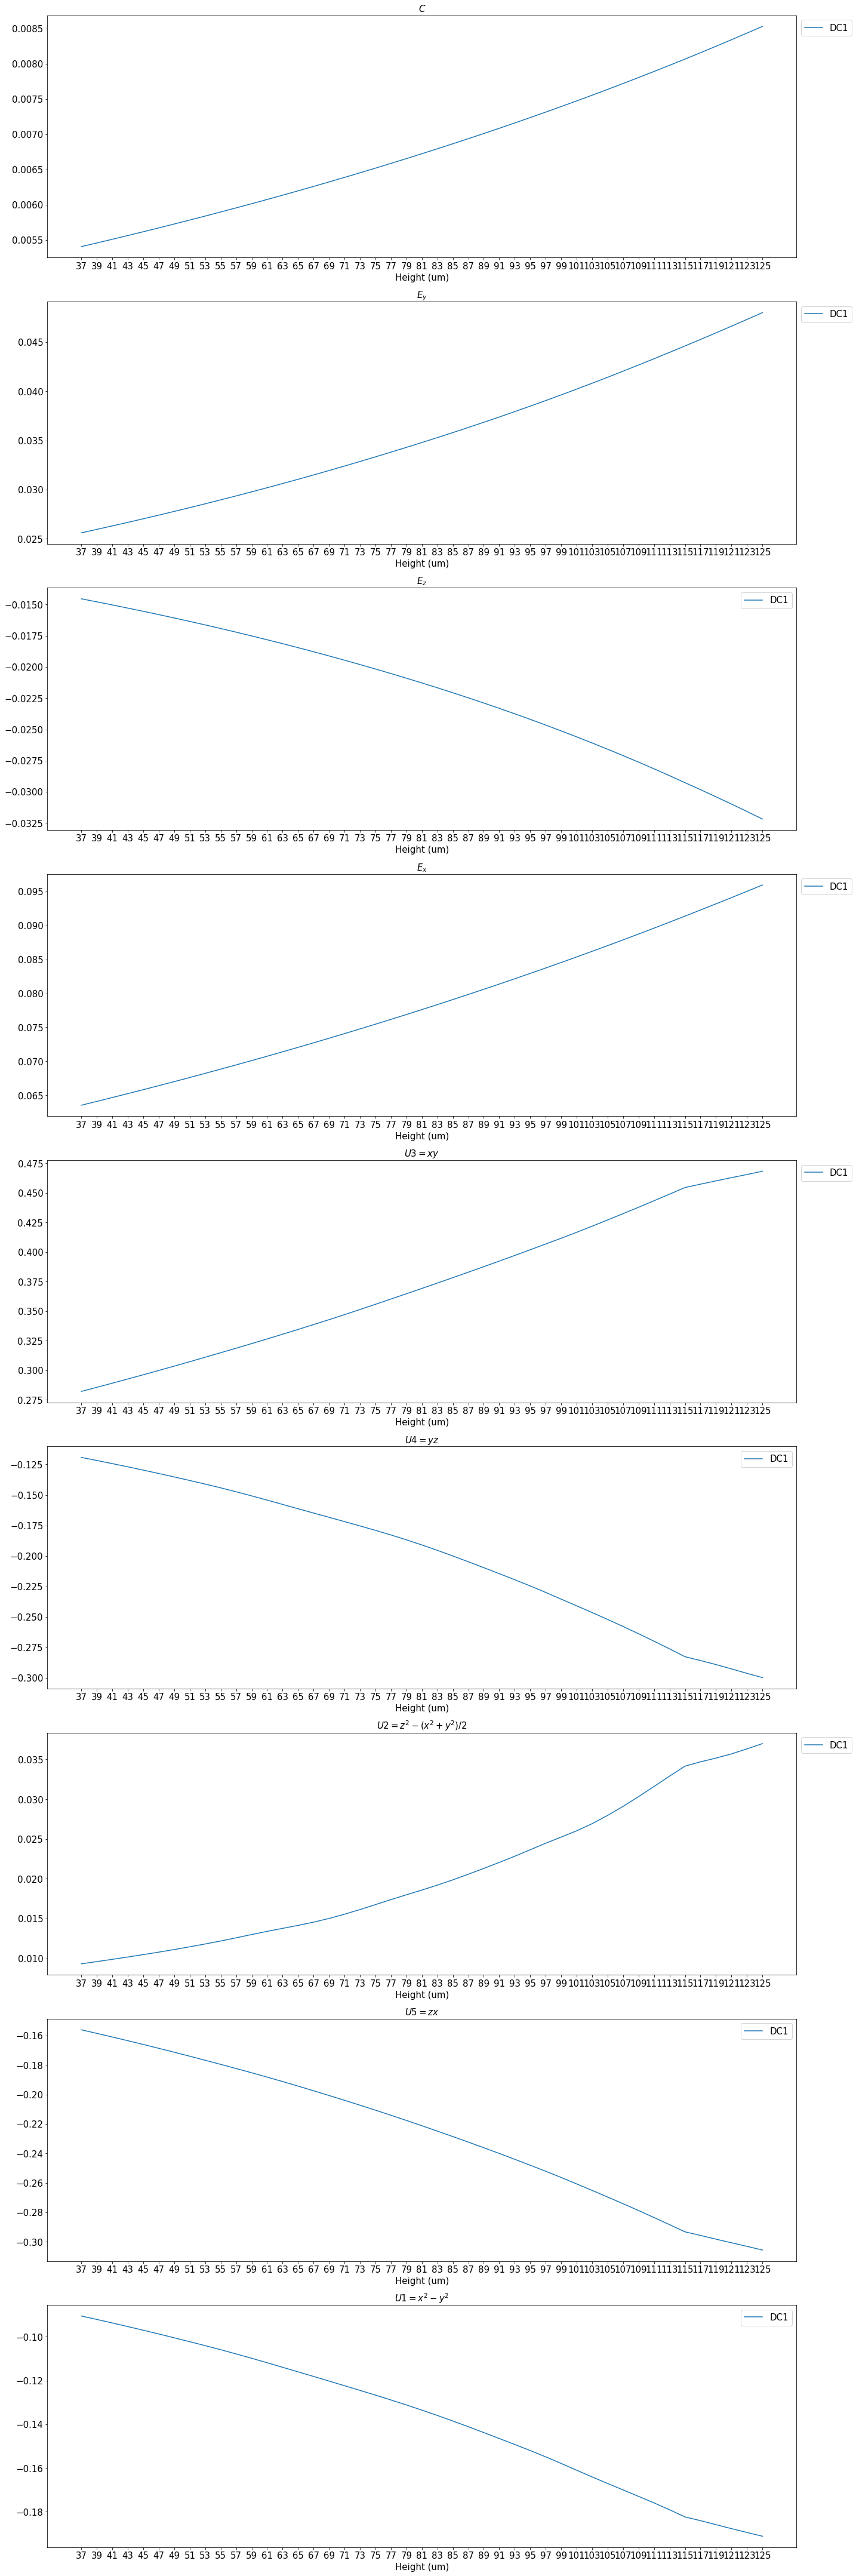

In [9]:
height_list = np.round(trap['Y'][nROI:]*1e3)
numMUltipoles = len(s.multipole_print_names)
ne = len(s.electrode_names)
multipoles_vs_height = np.zeros((len(height_list), numMUltipoles, ne))
print(height_list)
for i, height in enumerate(height_list):
    position1 = [xl,height*1e-3,zl]
    s.update_origin_roi(position1, roi)
    multipoles_vs_height[i] = np.asarray(s.multipole_expansion.loc[s.multipole_names])

size = 15
fig,ax = plt.subplots(numMUltipoles,1,figsize = (20,60))

from matplotlib import cm
colormap = cm.get_cmap('tab20')
def update_colors(ax):
    lines = ax.lines
    colors = colormap(np.linspace(0, 1, len(lines)))
    for line, c in zip(lines, colors):
        line.set_color(c)

for i, mul in enumerate(s.multipole_print_names):
    for j, ele in enumerate(s.electrode_names[0:1]):
        ax[i].plot(height_list, multipoles_vs_height[:,i,j], label = ele)
        ax[i].set_title(mul, fontsize = size)
        ax[i].set_xticks(height_list)
#         ax[i].set_xlim(left=50, right=100)
        ax[i].tick_params(labelsize = size)
        ax[i].set_xlabel('Height (um)', fontsize = size)
    update_colors(ax[i])
    ax[i].legend(fontsize = size, bbox_to_anchor=(1, 1))
        
fig.canvas.draw()
fig.tight_layout(pad=1)

# plot voltage solution of a group of multipole coefficients

In [10]:
def plot_muls(height, ey, ez, ex, u3, u2, u5, u1):
    position1 = [xl,height*1e-3,zl]
    s.update_origin_roi(position1, roi)
    multipole_coeffs = {'Ey': ey, 'Ez':ez, 'Ex': ex, 'U3':u3, 'U2':u2, 'U5':u5, 'U1':u1}
    voltages = s.setMultipoles(multipole_coeffs)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30,12))
    ax1.bar(s.controlled_elecs, voltages)
    ax1.set_xticklabels(s.controlled_elecs, rotation = 45, fontsize = 12)
#     ax1.set_ylim(-25, 40)
    ax1.set_ylabel('V')
    print(s.controlled_elecs)
    xpos = [s.electrode_positions[ele][0] for ele in s.controlled_elecs]
    ypos = [s.electrode_positions[ele][1] for ele in s.controlled_elecs]
    plot = ax2.scatter(xpos, ypos, 1000, list(voltages), cmap='bwr')
    fig.colorbar(plot)
    ax2.set_xlim(min(xpos)-1,max(xpos)+1)
    ax2.set_ylim(min(ypos)-1,max(ypos)+1)
    plt.subplots_adjust(bottom = 0.25)
    plt.show()
    
interactive_plot = interactive(plot_muls, height = (45,115,5), ez=(-1, 1, 0.1), ex=(-1, 1, 0.1), ey=(-1, 1, 0.1), u2 = (0 , 40), u5 = (-10, 10), u4 = (-10, 10), u1 = (-10, 10), u3 = (-10, 10))
output = interactive_plot.children[-1]
output.layout.height = '650px'
interactive_plot

interactive(children=(IntSlider(value=80, description='height', max=115, min=45, step=5), FloatSlider(value=0.…

# plot coefficients can be achieved for each multipole (controlled individually) when apply max 40 volts

/Users/Ben/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Text(0, 0.5, '$Ca^{+}$ trap frequency (MHz)')

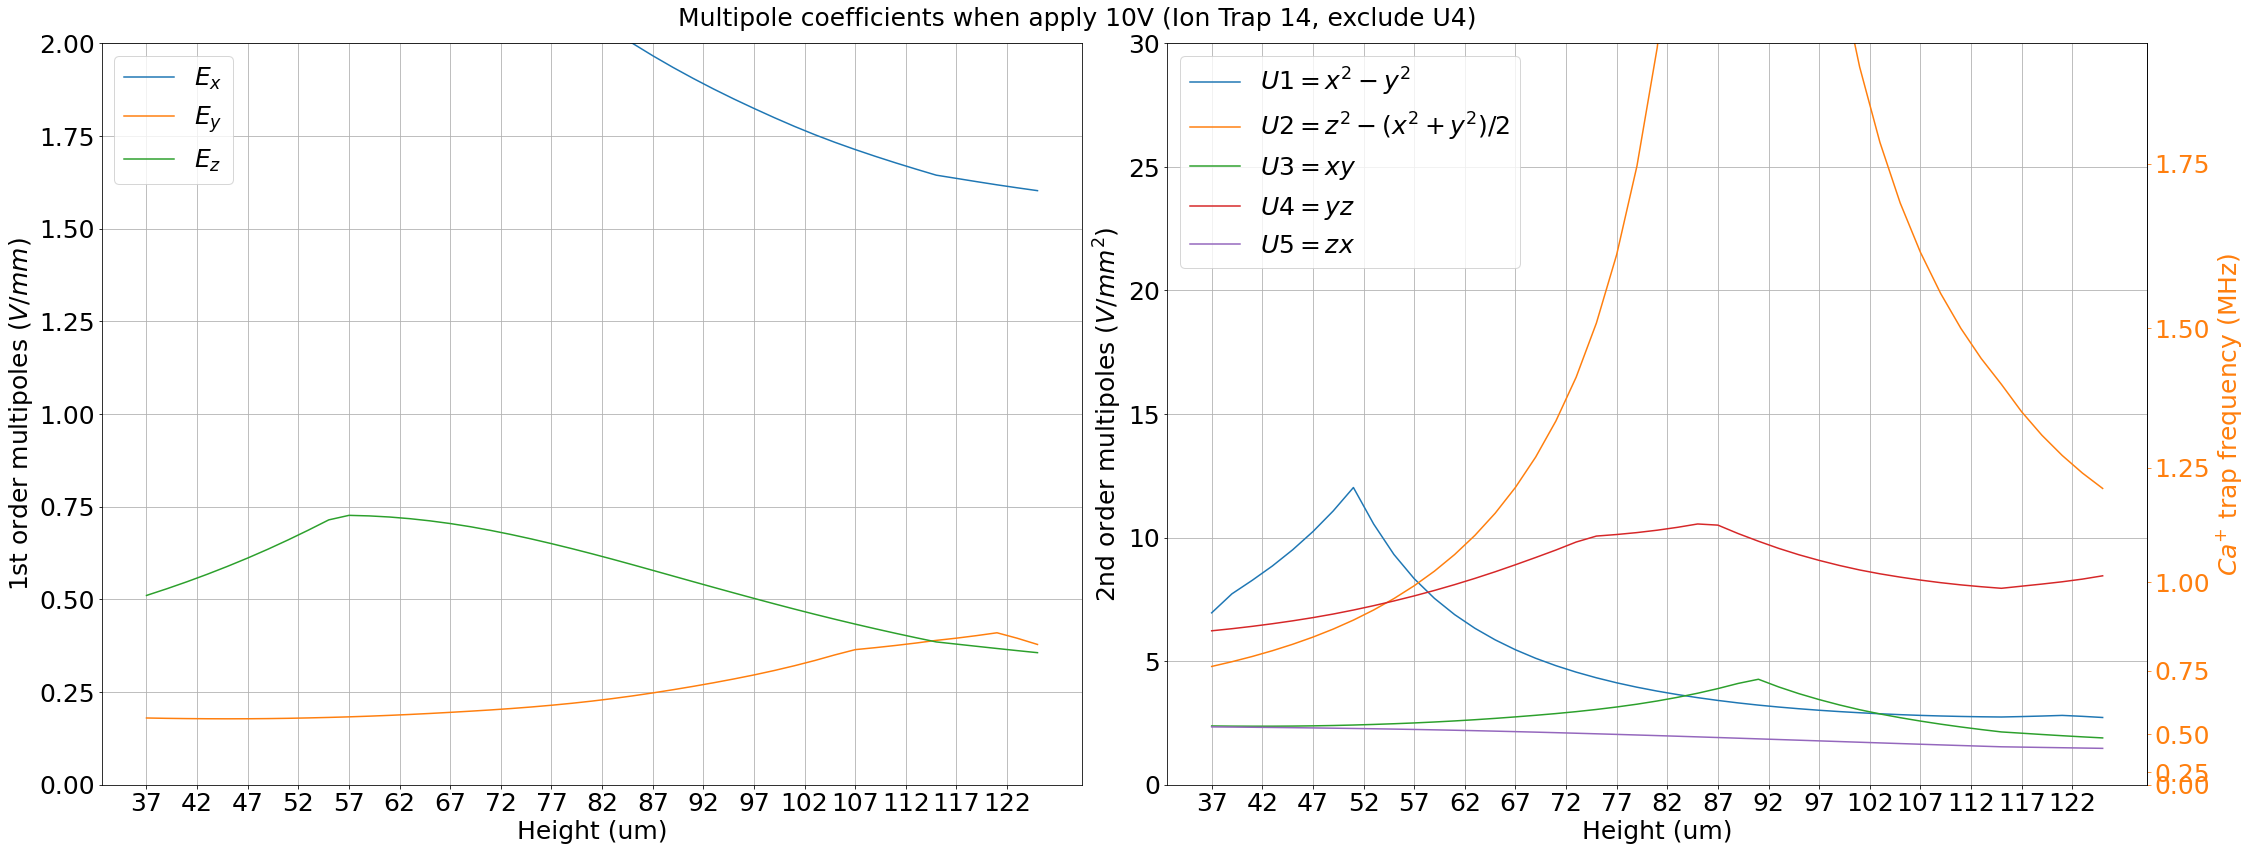

In [11]:
height_list = np.round(trap['Y'][nROI:]*1e3)
numMUltipoles = len(used_multipoles)
Coeffs = pd.DataFrame()
for height in height_list:
    position1 = [xl,height*1e-3,zl]
    s.update_origin_roi(position1, roi)
    
    Coeffs_temp = pd.Series()
    for key in used_multipoles:
        multipole_coeffs = pd.Series(np.zeros(len(used_multipoles)), index = used_multipoles)
        multipole_coeffs[key] = 1
        voltages = s.setMultipoles(multipole_coeffs)
        max_v = np.max(abs(voltages))
        Coeffs_temp[key] = 40/max_v
    
    Coeffs[height] = Coeffs_temp

size = 25
# plt.rc('xtick', labelsize=size)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30,12))
for mul in used_order1multipoles:
    ax1.plot(height_list, Coeffs.loc[mul], label = s.multipole_print_names[mul])
ax1.set_ylabel(r'1st order multipoles $(V/mm)$', fontsize = size)
ax1.set_xticks(np.arange(height_list[0],height_list[-1]+1,5))
ax1.set_xlabel('Height (um)', fontsize = size)
ax1.tick_params(labelsize = size)
ax1.legend(fontsize = size)

ax1.set_ylim(0, 2) # set ylim

ax1.grid(True)

for mul in used_order2multipoles:
    ax2.plot(height_list, Coeffs.loc[mul], label = s.multipole_print_names[mul])
ax2.set_ylabel(r'2nd order multipoles $(V/mm^2)$', fontsize = size)
ax2.set_xticks(np.arange(height_list[0],height_list[-1]+1,5))
ax2.set_xlabel('Height (um)', fontsize = size)

ax2.set_ylim(0,30) # set ylim

def U2_to_mhz(u2):
    m = 40.078 * 1.66e-27
    e = 1.6e-19
    return np.sqrt(2*e*u2*1e6/m) / 2 / np.pi / 1e6
def mhz_to_U2(mhz):
    m = 40.078 * 1.66e-27
    e = 1.6e-19
    return 4 * np.pi**2 * 1e12 * 1e-6 * m * mhz**2 / 2 / e

ax2.tick_params(labelsize = size)
ax2.legend(fontsize = size)
ax2.grid(True)
fig.suptitle('Multipole coefficients when apply 10V (Ion Trap 14, exclude U4)', fontsize = size)
fig.tight_layout(pad=1)

secax = ax2.secondary_yaxis('right', functions = (U2_to_mhz, mhz_to_U2))
secax.tick_params(labelsize = size, colors = '#ff7f0e')
secax.set_ylabel('$Ca^{+}$ trap frequency (MHz)', fontsize = size, color = '#ff7f0e')

# plt.savefig('Multipole_coeffs_20v_rfbias.jpg', format = 'jpg', dpi = 300)

# plot potential projection along x, y, z axis when apply voltage solution of a group of multipole coefficients

In [12]:
def plot_1d(height, ey, ez, ex, u3, u2, u5, u1):
    position1 = [xl,height*1e-3,zl]
    s.update_origin_roi(position1, roi)
    multipole_coeffs = {'Ey': ey, 'Ez':ez, 'Ex': ex, 'U3':u3, 'U2':u2, 'U5':u5, 'U1':u1}
    voltages = s.setMultipoles(multipole_coeffs)
    #this is the 'original' plot- this corresponds to plugging your solutions for your electrodes
    #(i.e. your c-file where for this case we set pure u2) into the bem simulation
    #to directly create the field
    potential_roi = s.potentialControl_roi(voltages)
    #this takes the electrode solutions
    potential_regen = s.potentialControl_regen(voltages)

    nearestZ = find_nearest(s.Z, height*1e-3)
    indNearestZ_roi = np.abs(s.Z_roi - nearestZ).argmin()
    x0 = find_nearest(s.X, 0)
    indx0_roi = np.abs(s.X_roi - x0).argmin()
    y0 = find_nearest(s.Y, 0)
    indy0_roi = np.abs(s.Y_roi - y0).argmin()
#     print(s.X_trunc)
    
    potential_z_roi = potential_roi[indx0_roi, indy0_roi, :]
    potential_z_regen = potential_regen[indx0_roi, indy0_roi, :]
    potential_x_roi = potential_roi[:, indy0_roi, indNearestZ_roi]
    potential_x_regen = potential_regen[:, indy0_roi, indNearestZ_roi]
    potential_y_roi = potential_roi[indx0_roi, :, indNearestZ_roi]
    potential_y_regen = potential_regen[indx0_roi, :, indNearestZ_roi]
    
    offset = potential_roi[indx0_roi, indy0_roi, indNearestZ_roi] - potential_regen[indx0_roi, indy0_roi, indNearestZ_roi]
    print(offset)
    
    fsize = 20
    
    fig1, ax = plt.subplots(3,1,figsize = (10,20))
    ax[0].set_title('Potential along X', fontsize = fsize)
    ax[0].grid()
    ax[0].plot(s.X_roi*1e3, potential_x_roi, label = 'original')
    ax[0].plot(s.X_roi*1e3, potential_x_regen + offset, label = 'regenerated + offset')
    ax[0].set_xlabel('X ($\mu$m)', fontsize = fsize)
    ax[0].set_ylabel('V (v)', fontsize = fsize)
    ax[0].legend(fontsize = fsize)
    
    ax[1].set_title('Potential along Y', fontsize = fsize)
    ax[1].grid()
    ax[1].plot(s.Y_roi*1e3, potential_y_roi, label = 'original')
    ax[1].plot(s.Y_roi*1e3, potential_y_regen + offset, label = 'regenerated + offset')
    ax[1].set_xlabel('Y ($\mu$m)', fontsize = fsize)
    ax[1].set_ylabel('V (v)', fontsize = fsize)
    ax[1].legend(fontsize = fsize)
    
    ax[2].set_title('Potential along Z', fontsize = fsize)
    ax[2].grid()
    ax[2].plot(s.Z_roi*1e3, potential_z_roi, label = 'original')
    ax[2].plot(s.Z_roi*1e3, potential_z_regen + offset, label = 'regenerated + offset')
    ax[2].set_xlabel('Z ($\mu$m)', fontsize = fsize)
    ax[2].set_ylabel('V (v)', fontsize = fsize)
    ax[2].legend(fontsize = fsize)
    
    fig1.tight_layout(pad=1)
    
    plt.show()
    
interactive_plot = interactive(plot_1d, height = (25,125), ez=(-1, 1, 0.1), ex=(-1, 1, 0.1), ey=(-1, 1, 0.1), u2 = (0 , 40), u5 = (-10, 10), u4 = (-10, 10), u1 = (-10, 10), u3 = (-10, 10))
output = interactive_plot.children[-1]
output.layout.height = '1500px'
interactive_plot

interactive(children=(IntSlider(value=75, description='height', max=125, min=25), FloatSlider(value=0.0, descr…

In [13]:
outarray = []
for multipole in s.pinv_matrix:
    for num in np.arange(1,22):
        key = "DC"+str(num)
        if key in controlled_electrodes:
            outarray = np.append(outarray, s.pinv_matrix[multipole]["DC" + str(num)])
        else:
            outarray = np.append(outarray,0)
print(np.shape(outarray))
pd.DataFrame(outarray).to_csv('el3_', header=None, index=None, float_format='%.15f')

(168,)


# plot potential projection in xy plane when apply voltage solution of a group of multipole coefficients

In [14]:
def plot_U2(height, ey, ez, ex, u3, u2, u5, u1):
    position1 = [xl,height*1e-3,zl]
    s.update_origin_roi(position1, roi)
    multipole_coeffs = {'Ey': ey, 'Ez':ez, 'Ex': ex, 'U3':u3, 'U2':u2, 'U5':u5, 'U1':u1}
    voltages = s.setMultipoles(multipole_coeffs)
    potential_roi = s.potentialControl_roi(voltages)
    potential_regen = s.potentialControl_regen(voltages)

    nearestZ = find_nearest(s.Z, height*1e-3)
    indNearestZ_roi = np.abs(s.Z_roi - nearestZ).argmin()
    
    potential_xy_roi = potential_roi[:,:,indNearestZ_roi]
    potential_xy_regen = potential_regen[:,:,indNearestZ_roi]
    
    
    fsize = 20
    
    fig1 = plt.figure(figsize = (20,16))
    grid = plt.GridSpec(2,2)
    ax1 = fig1.add_subplot(grid[0,0])
    ax2 = fig1.add_subplot(grid[0,1])
    ax3 = fig1.add_subplot(grid[1,:])
    ax1.set_title('Simulated potential', fontsize = fsize)
    levels1 = np.linspace(np.amin(potential_xy_roi),np.amax(potential_xy_roi),100)
    plot1 = ax1.contourf(s.X_roi*1e3, s.Y_roi*1e3, potential_xy_roi, levels1, cmap = plt.cm.viridis)
    plot1_line = ax1.contour(s.X_roi*1e3, s.Y_roi*1e3, potential_xy_roi, colors = 'w')
#     ax1.clabel(plot1_line, inline = 1, fontsize = fsize)
    ax1.clabel(plot1_line, colors = 'w', fmt = '%2.3f', fontsize=fsize)
    ax1.set_xlabel('X (mm)', fontsize = fsize)
    ax1.set_ylabel('Y (mm)', fontsize = fsize)
    plt.colorbar(plot1, ax = ax1)
    
    ax2.set_title('Regenerated potential', fontsize = fsize)
    levels2 = np.linspace(np.amin(potential_xy_regen),np.amax(potential_xy_regen),100)
    plot2 = ax2.contourf(s.X_roi*1e3, s.Y_roi*1e3, potential_xy_regen, levels2, cmap = plt.cm.viridis)
    plot2_line = ax2.contour(s.X_roi*1e3, s.Y_roi*1e3, potential_xy_regen, colors = 'w')
#     ax2.clabel(plot2, inline = 1, fontsize = fsize)
    ax2.clabel(plot2_line, colors = 'w', fmt = '%2.3f', fontsize=fsize)
    ax2.set_xlabel('X (mm)', fontsize = fsize)
    plt.colorbar(plot2, ax = ax2)
    
    coeffs = s.setVoltages(voltages)
#     print(coeffs.index)
    ax3.bar(range(len(coeffs)),np.asarray(coeffs))
    max_coeff = np.max(coeffs)
    min_coeff = np.min(coeffs)
    margin = (max_coeff - min_coeff)*0.1
    ymax = max_coeff + margin
    ymin = min_coeff - margin
    ax3.set_ylim(ymin, ymax)
    add_value_labels(ax3)
    ax3.set_xticks(range(len(coeffs)))
    ax3.set_xticklabels(s.multipole_names, rotation = -90, fontsize = fsize)
    plt.show()
    
interactive_plot = interactive(plot_U2, height = (45, 105), ez=(-1.5, 1.5, 0.1), ex=(-1.5, 1.5, 0.1), ey=(-1.5, 1.5, 0.1), u2 = (0 , 40), u5 = (-10, 10), u4 = (-10, 10), u1 = (-10, 10), u3 = (-10, 10))
output = interactive_plot.children[-1]
output.layout.height = '1000px'
interactive_plot

interactive(children=(IntSlider(value=75, description='height', max=105, min=45), FloatSlider(value=0.0, descr…

In [15]:
a = [[1,2,3], [4,5,6], [7,8,9]]
np.ravel(a, 'F')

array([1, 4, 7, 2, 5, 8, 3, 6, 9])

In [16]:
multipole_names = ['Ey', 'Ez', 'Ex', 'U3', 'U2', 'U5', 'U1']
height_list = [80, 90, 100, 110, 120, 130,  140, 150, 160, 170, 180, 190, 200]
volts_all_heights = []
for height in height_list:
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    volts_all_elecs = []
    for multip in multipole_names:
        multipole_coeffs = {'Ey':0, 'Ez':0, 'Ex': 0, 'U3':0, 'U2':0, 'U5':0, 'U1':0}
        multipole_coeffs[multip] = 1
        voltages = s.setMultipoles(multipole_coeffs)
        volts_all_elecs.append(voltages.values)
    volts_all_heights.append(np.ravel(volts_all_elecs, order = 'C'))
volts_all_heights = np.transpose(volts_all_heights)

IndexError: index 1 is out of bounds for axis 0 with size 0

In [ ]:
volts_all_heights.shape

In [ ]:
import csv

header1 = ['multipoles: Ey, Ez, Ex, U3, U2, U5, U1']
header2 = ['default position: 100']
with open('3d_trap14_cfile.csv', 'w', newline='') as csvfile:
    cfile = csv.writer(csvfile, delimiter=' ', escapechar = ' ', quoting = csv.QUOTE_NONE)
    cfile.writerow(header1)
    cfile.writerow(header2)
    cfile.writerows(list(volts_all_heights))
    cfile.writerow(height_list)

In [ ]:
cfile_path = '3d_trap14_cfile.csv'
cfile_text = open(cfile_path).read().split('\n')[:-1]

In [ ]:
cfile_text[0].split('ultipoles:')[1].replace(' ','').split(',')

In [ ]:
cfile_text

In [ ]:
height_list1 = np.arange(80, 201, 1)
m_ca = 6.66e-26
omega_rf = 2* np.pi * 52.05e6
e = 1.6e-19
v_per_mhz = []
for height in height_list1:
    position1 = [0,0,height*1e-3]
    s.update_origin_roi(position1, roi)
    rf_quad = (s.multipole_expansion['RF2']['U3'] - s.multipole_expansion['RF1']['U3']) / 2 * 1e6
    v_per_mhz.append(m_ca * omega_rf * 2*np.pi / np.sqrt(2) / rf_quad / e * 1e6)

In [64]:
s.update_origin_roi([xl,yl,zl], roi)
# s.multipole_expansion['RF1']['U3']

ValueError: x and y must have same first dimension, but have shapes (121,) and (0,)

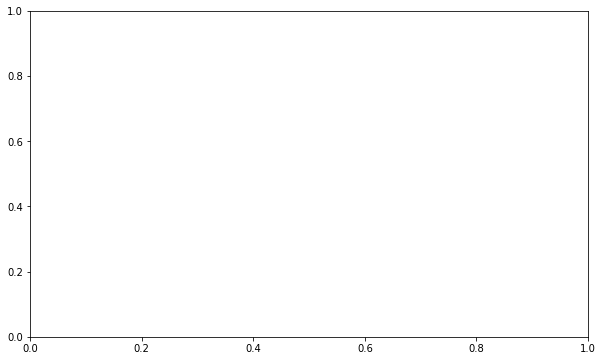

In [65]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(height_list1, v_per_mhz)
ax.set_ylim(6, 14)
size = 16
ax.tick_params(labelsize = size)
ax.set_ylabel('voltage(v) / secular frequency (MHz)', fontsize = size)
ax.set_xlabel('distance from substrate (um)', fontsize = size)